In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
df_trts = pd.read_csv('train_time_series.csv')
df_trl = pd.read_csv('train_labels.csv')
df = pd.merge(df_trts,df_trl, on=['timestamp'], how = 'left')

In [3]:
df.head()

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046,NaN,NaN,NaN
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554,NaN,NaN,NaN
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467,NaN,NaN,NaN
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,20589.0,2019-08-06T16:45:31.087,1.0
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450,NaN,NaN,NaN


In [4]:
df2 = df
df2['label']= df2['label'].where(df2['label'].notnull(), 
                                other=df2['label'].fillna(method='ffill'))

In [5]:
df2.head()

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046,NaN,NaN,NaN
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554,NaN,NaN,NaN
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467,NaN,NaN,NaN
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,20589.0,2019-08-06T16:45:31.087,1.0
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450,NaN,NaN,1.0


In [6]:
df2 = df2[['timestamp','UTC time_x','x','y','z','label']]

In [7]:
df2

,timestamp,UTC time_x,x,y,z,label
0,1565109930787,2019-08-06T16:45:30.787,-0.006485,-0.934860,-0.069046,NaN
1,1565109930887,2019-08-06T16:45:30.887,-0.066467,-1.015442,0.089554,NaN
2,1565109930987,2019-08-06T16:45:30.987,-0.043488,-1.021255,0.178467,NaN
3,1565109931087,2019-08-06T16:45:31.087,-0.053802,-0.987701,0.068985,1.0
4,1565109931188,2019-08-06T16:45:31.188,-0.054031,-1.003616,0.126450,1.0
5,1565109931288,2019-08-06T16:45:31.288,-0.010880,-0.967575,0.170898,1.0
6,1565109931388,2019-08-06T16:45:31.388,0.052841,-0.982330,0.235565,1.0
7,1565109931488,2019-08-06T16:45:31.488,0.032974,-1.053207,0.256714,1.0
8,1565109931589,2019-08-06T16:45:31.589,-0.090424,-0.972794,0.356308,1.0
9,1565109931689,2019-08-06T16:45:31.689,0.124268,-0.890533,0.223221,1.0


In [8]:
df2 = df2.drop([0,1,2]).reset_index()

In [9]:
df2['acceleration'] = (df2.x**2+df2.y**2+df2.z**2)**0.5

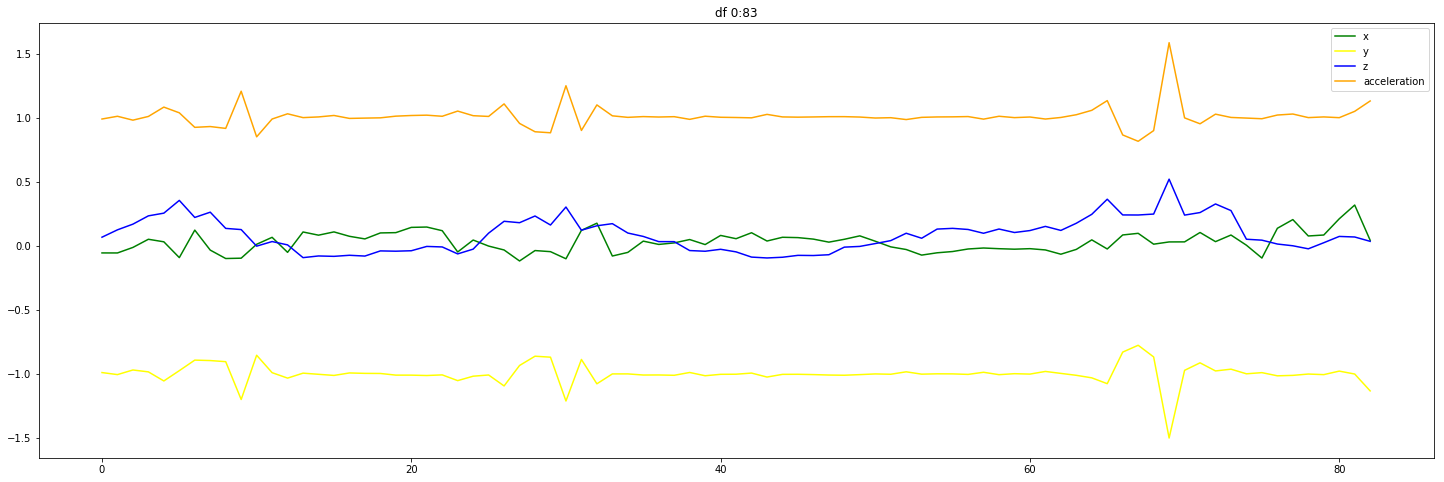

In [10]:
start = 0
end = 83
plt.figure(figsize=(25,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(83),df2[start:end].x, color = 'green')
plt.plot(range(83),df2[start:end].y, color = 'yellow')
plt.plot(range(83),df2[start:end].z, color = 'blue')
plt.plot(range(83),df2[start:end].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('df 0:83')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [11]:
df2['acceleration'] = (df2.x**2 + df2.y**2 + df2.z**2)**0.5

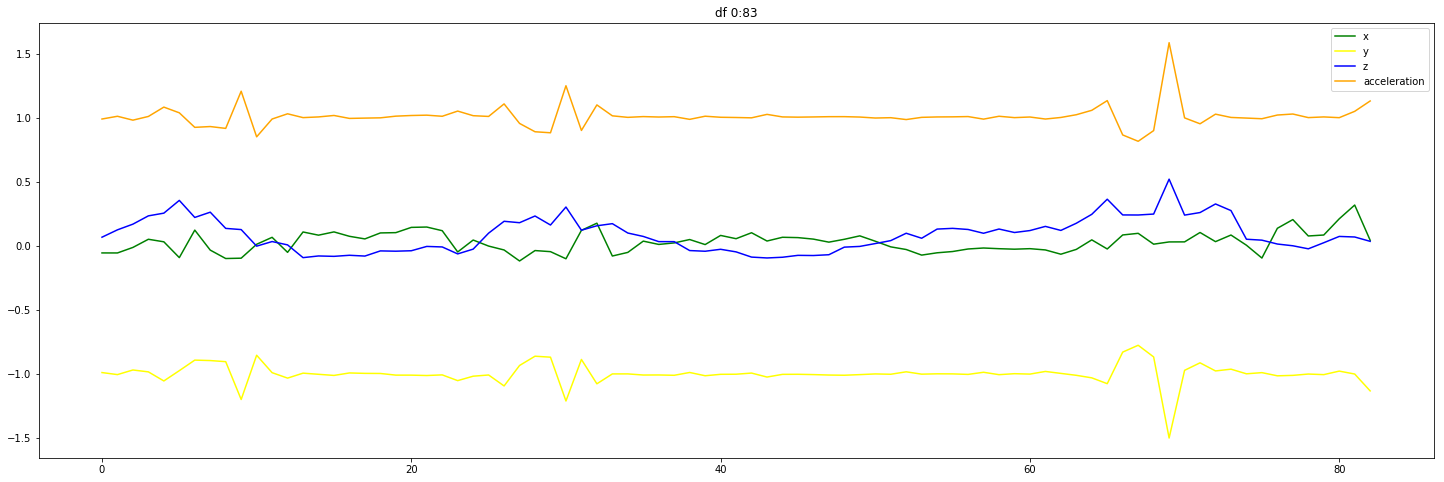

In [12]:
start = 0
end = 83
plt.figure(figsize=(25,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(83),df2[start:end].x, color = 'green')
plt.plot(range(83),df2[start:end].y, color = 'yellow')
plt.plot(range(83),df2[start:end].z, color = 'blue')
plt.plot(range(83),df2[start:end].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('df 0:83')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [13]:
df2.to_csv('df2.csv')

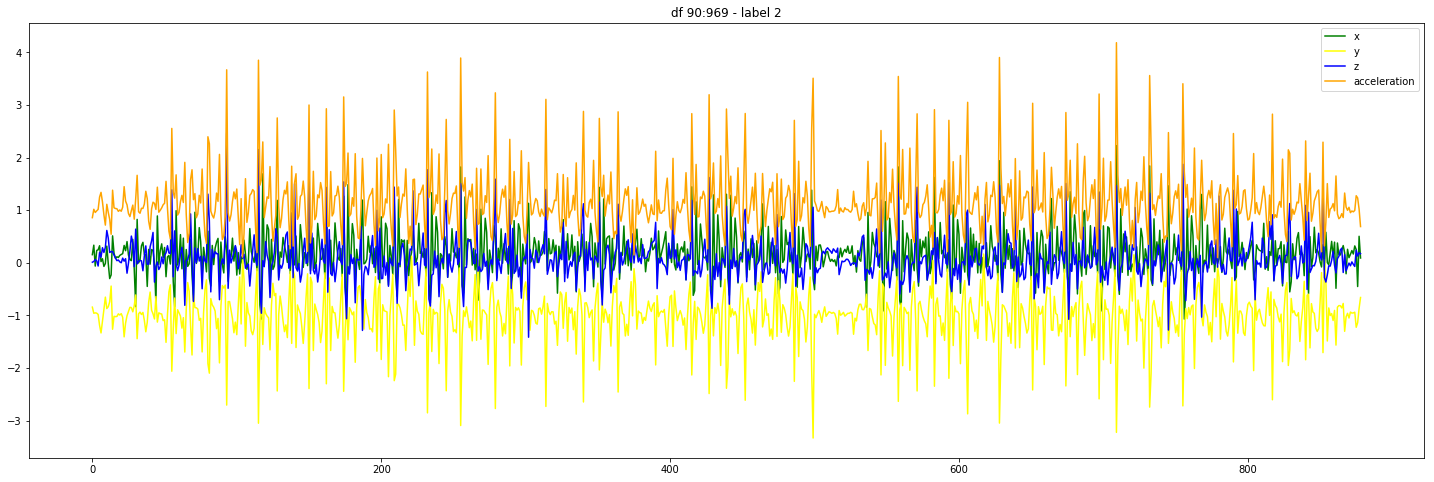

In [14]:
start = 90
end = 969
plt.figure(figsize=(25,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(end-start),df2[start:end].x, color = 'green')
plt.plot(range(end-start),df2[start:end].y, color = 'yellow')
plt.plot(range(end-start),df2[start:end].z, color = 'blue')
plt.plot(range(end-start),df2[start:end].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('df 90:969 - label 2')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

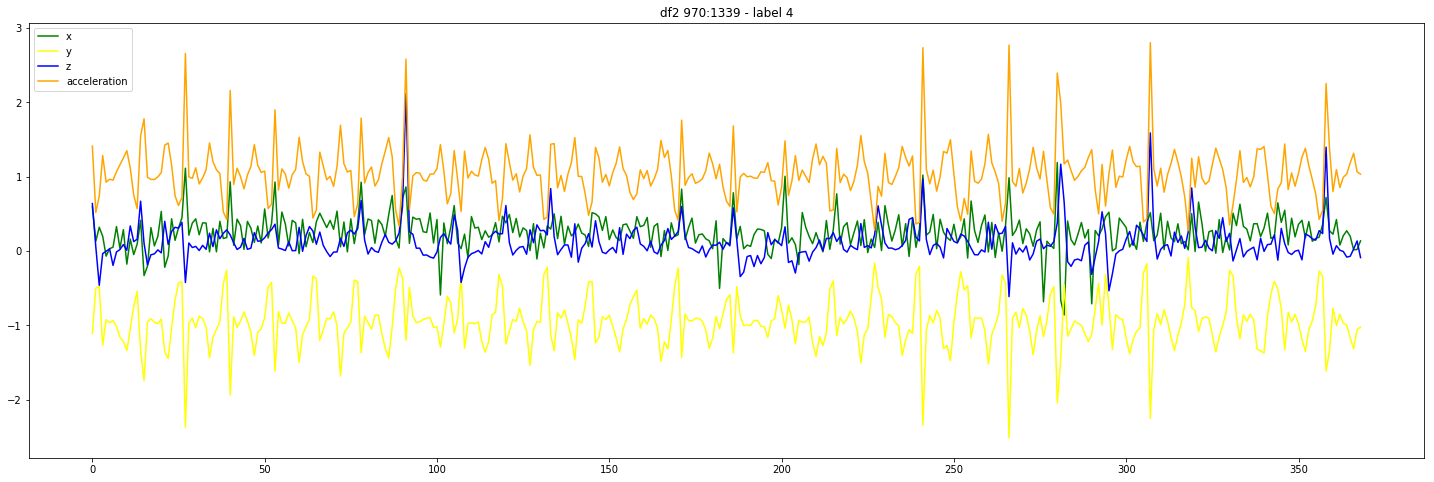

In [15]:
start = 970
end = 1339
plt.figure(figsize=(25,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(end-start),df2[start:end].x, color = 'green')
plt.plot(range(end-start),df2[start:end].y, color = 'yellow')
plt.plot(range(end-start),df2[start:end].z, color = 'blue')
plt.plot(range(end-start),df2[start:end].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('df2 970:1339 - label 4')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

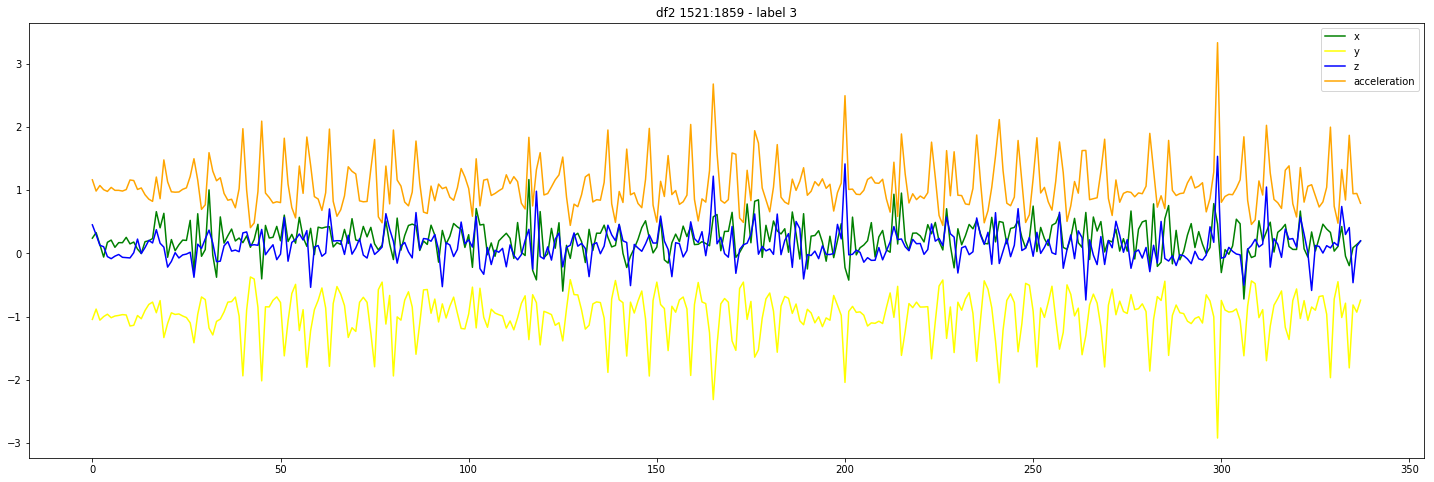

In [16]:
start = 1521
end = 1859
plt.figure(figsize=(25,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(end-start),df2[start:end].x, color = 'green')
plt.plot(range(end-start),df2[start:end].y, color = 'yellow')
plt.plot(range(end-start),df2[start:end].z, color = 'blue')
plt.plot(range(end-start),df2[start:end].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('df2 1521:1859 - label 3')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [17]:
df2label1 = df2[0:90]
df2label2 = df2[260:350]
df2label3 = df2[1740:1830]
df2label4 = df2[1200:1290]

In [18]:
def movelet_dict_generator (dataframes,columns):
    '''this function takes a list of dataframes each one chosen for being representative of
    a given movement (label), the columns of interest(ie. x, y, z,label) and the lenght of the 
    sample of the movement that is going to be used to generate de movelet dictionary'''
    movelet_dict = pd.DataFrame(columns = columns)
    for d in dataframes:
        movelet_dictionary =pd.DataFrame(columns = columns)
        for c in columns:
            i = 0
            j = 10
            movelet_column = []
            for n in range(d.shape[0]-10):
                movelet_column.append(d[c][i:j])
                i+=1
                j+=1
            movelet_dictionary[c] = movelet_column   
        movelet_dict = movelet_dict.append(movelet_dictionary,ignore_index=True)
    movelet_dict['label'].loc[0:80] = 1
    movelet_dict['label'].loc[80:160]= 2
    movelet_dict['label'].loc[160:240]= 3
    movelet_dict['label'].loc[240:320]= 4
    return movelet_dict


In [19]:
dataframes = [df2label1,df2label2,df2label3,df2label4]

In [20]:
movelet_dict_xyz = movelet_dict_generator(dataframes,['x','y','z','label'])

In [21]:
movelet_dict_xyz

,x,y,z,label
0,0 -0.053802 1 -0.054031 2 -0.010880 3 ...,0 -0.987701 1 -1.003616 2 -0.967575 3 ...,0 0.068985 1 0.126450 2 0.170898 3 ...,1
1,1 -0.054031 2 -0.010880 3 0.052841 4...,1 -1.003616 2 -0.967575 3 -0.982330 4...,1 0.126450 2 0.170898 3 0.235565 4...,1
2,2 -0.010880 3 0.052841 4 0.032974 5...,2 -0.967575 3 -0.982330 4 -1.053207 5...,2 0.170898 3 0.235565 4 0.256714 5...,1
3,3 0.052841 4 0.032974 5 -0.090424 6...,3 -0.982330 4 -1.053207 5 -0.972794 6...,3 0.235565 4 0.256714 5 0.356308 6...,1
4,4 0.032974 5 -0.090424 6 0.124268 7...,4 -1.053207 5 -0.972794 6 -0.890533 7...,4 0.256714 5 0.356308 6 0.223221 7...,1
5,5 -0.090424 6 0.124268 7 -0.031784 8...,5 -0.972794 6 -0.890533 7 -0.893982 8...,5 0.356308 6 0.223221 7 0.264236 8...,1
6,6 0.124268 7 -0.031784 8 -0.097427 9...,6 -0.890533 7 -0.893982 8 -0.902725 9...,6 0.223221 7 0.264236 8 0.137680 9...,1
7,7 -0.031784 8 -0.097427 9 -0.094864 1...,7 -0.893982 8 -0.902725 9 -1.197876 1...,7 0.264236 8 0.137680 9 0.128494 1...,1
8,8 -0.097427 9 -0.094864 10 0.013718 1...,8 -0.902725 9 -1.197876 10 -0.852371 1...,8 0.137680 9 0.128494 10 -0.000870 1...,1
9,9 -0.094864 10 0.013718 11 0.067947 1...,9 -1.197876 10 -0.852371 11 -0.988525 1...,9 0.128494 10 -0.000870 11 0.034973 1...,1


In [22]:
def label_prediction_improved(X_test,movelet_dict,axs):
    '''this functions takes a test dataframe (unlabeled)and a movelet dict and performs the algorithm to find the
    movelet with the smallest difference considering the sum of the difference for each axis '''
    differences = pd.DataFrame()
    for j in axs:
        diff_list =[]
        for i in range(movelet_dict.shape[0]):
            mdict = movelet_dict[j][i].reset_index(drop = True)
            X_test_val = X_test[j].reset_index(drop = True)
            diff = np.sum((mdict - X_test_val)**2)
            diff_list.append(diff)
        differences[j] = diff_list
    differences['total_diff'] = differences.sum (axis = 1)
    min_loc = differences['total_diff'].idxmin()
    min_label = movelet_dict['label'][min_loc]
    #min_label_predict.append(min_label)
    #print(differences[min_loc-10:min_loc+10])
    return (min_loc,min_label)

In [23]:
testdf = df2[2870:2880]

In [24]:
label_prediction_improved(testdf,movelet_dict_xyz,['x','y','z'])

(179, 3)

In [25]:
movelet_dict_xyza = movelet_dict_generator(dataframes,['x','y','z','label','acceleration'])

In [26]:
label_prediction_improved(testdf,movelet_dict_xyza,['x','y','z','acceleration'])

(179, 3)

In [27]:
def automated_prediction_process (df,movelet_dict,axis):
    start_time = time.time()
    labels = []
    k = 0
    df_len = df.shape[0]
    for each in range(df_len//10):
        lb = label_prediction_improved(df[k:k+10],movelet_dict,axis)
        for r in range (10):
            labels.append(lb[1])
        k+=10
    for n in range(df_len - len(labels)):
        labels.append(labels[-1])
    print ("My program took", time.time() - start_time, "to run")
    return labels

In [28]:
df2_test = pd.read_csv('test_df2.csv')

In [29]:
df2_test

,index_0,index_1,timestamp,UTC,x,y,z,label,acceleration
0,80,83,1.565110e+12,2019-08-06T16:45:39.106,0.212524,-0.976364,0.074997,1,1.002037
1,81,84,1.565110e+12,2019-08-06T16:45:39.206,0.319931,-0.999161,0.070587,1,1.051504
2,82,85,1.565110e+12,2019-08-06T16:45:39.306,0.044952,-1.130875,0.036713,1,1.132363
3,83,86,1.565110e+12,2019-08-06T16:45:39.406,0.027786,-1.056137,0.206299,1,1.076456
4,84,87,1.565110e+12,2019-08-06T16:45:39.507,-0.102234,-0.942154,0.176651,1,0.964008
5,85,88,1.565110e+12,2019-08-06T16:45:39.607,0.243851,-0.950607,0.333237,1,1.036419
6,86,89,1.565110e+12,2019-08-06T16:45:39.707,0.148941,-0.695190,0.288696,1,0.767345
7,87,90,1.565110e+12,2019-08-06T16:45:39.807,0.108704,-0.853134,0.478043,1,0.983961
8,88,91,1.565110e+12,2019-08-06T16:45:39.908,0.611084,-1.319809,0.048599,1,1.455225
9,89,92,1.565110e+12,2019-08-06T16:45:40.008,0.127579,-1.112778,-0.192474,1,1.136484


In [30]:
labels_xyz = automated_prediction_process(df2_test,movelet_dict_xyz,['x','y','z'])

My program took 36.17875385284424 to run


In [31]:
labels_xyza = automated_prediction_process(df2_test,movelet_dict_xyza,['x','y','z','acceleration'])

My program took 47.93752670288086 to run


In [32]:
df2_test['p_label_xyz'] = labels_xyz
df2_test['p_label_xyza'] = labels_xyza

In [33]:
df2_test.head(40)

,index_0,index_1,timestamp,UTC,x,y,z,label,acceleration,p_label_xyz,p_label_xyza
0,80,83,1.565110e+12,2019-08-06T16:45:39.106,0.212524,-0.976364,0.074997,1,1.002037,1,1
1,81,84,1.565110e+12,2019-08-06T16:45:39.206,0.319931,-0.999161,0.070587,1,1.051504,1,1
2,82,85,1.565110e+12,2019-08-06T16:45:39.306,0.044952,-1.130875,0.036713,1,1.132363,1,1
3,83,86,1.565110e+12,2019-08-06T16:45:39.406,0.027786,-1.056137,0.206299,1,1.076456,1,1
4,84,87,1.565110e+12,2019-08-06T16:45:39.507,-0.102234,-0.942154,0.176651,1,0.964008,1,1
5,85,88,1.565110e+12,2019-08-06T16:45:39.607,0.243851,-0.950607,0.333237,1,1.036419,1,1
6,86,89,1.565110e+12,2019-08-06T16:45:39.707,0.148941,-0.695190,0.288696,1,0.767345,1,1
7,87,90,1.565110e+12,2019-08-06T16:45:39.807,0.108704,-0.853134,0.478043,1,0.983961,1,1
8,88,91,1.565110e+12,2019-08-06T16:45:39.908,0.611084,-1.319809,0.048599,1,1.455225,1,1
9,89,92,1.565110e+12,2019-08-06T16:45:40.008,0.127579,-1.112778,-0.192474,1,1.136484,1,1


In [34]:
df2_test[100:120]

,index_0,index_1,timestamp,UTC,x,y,z,label,acceleration,p_label_xyz,p_label_xyza
100,180,183,1.565110e+12,2019-08-06T16:45:49.129,-0.036880,-0.432678,0.072433,2,0.440247,2,2
101,181,184,1.565110e+12,2019-08-06T16:45:49.229,-0.192886,-0.480667,-0.020432,2,0.518328,2,2
102,182,185,1.565110e+12,2019-08-06T16:45:49.329,0.495605,-0.424744,0.580353,2,0.873408,2,2
103,183,186,1.565110e+12,2019-08-06T16:45:49.429,0.238647,-2.705444,2.465149,2,3.667880,2,2
104,184,187,1.565110e+12,2019-08-06T16:45:49.530,-0.351700,-0.738541,-0.485077,2,0.951018,2,2
105,185,188,1.565110e+12,2019-08-06T16:45:49.630,0.164047,-0.737732,0.239883,2,0.792909,2,2
106,186,189,1.565110e+12,2019-08-06T16:45:49.730,0.108032,-0.903290,-0.003326,2,0.909733,2,2
107,187,190,1.565110e+12,2019-08-06T16:45:49.830,0.467880,-1.061951,0.093918,2,1.164247,2,2
108,188,191,1.565110e+12,2019-08-06T16:45:49.930,0.031403,-1.330811,0.201874,2,1.346401,2,2
109,189,192,1.565110e+12,2019-08-06T16:45:50.031,0.314590,-1.128571,0.326355,2,1.216202,2,2


In [35]:
def accu(train_label,predicted_label):
    accu = (np.sum(train_label==predicted_label))/predicted_label.shape[0]
    return accu

In [36]:
accu(df2_test.label,df2_test.p_label_xyz)

0.6666666666666666

In [37]:
df2_test_l1 = df2_test[df2_test['label']==1]

In [38]:
accu(df2_test_l1.label,df2_test_l1.p_label_xyz)

1.0

In [39]:
df2_test_l2 = df2_test[df2_test['label']==2]

In [40]:
accu(df2_test_l2.label,df2_test_l2.p_label_xyz)

0.4883720930232558

In [41]:
df2_test_l3 = df2_test[df2_test['label']==3]

accu(df2_test_l3.label,df2_test_l3.p_label_xyz)

0.8214285714285714

In [42]:
df2_test_l4 = df2_test[df2_test['label']==4]

accu(df2_test_l4.label,df2_test_l4.p_label_xyz)

0.7619047619047619

In [43]:
df2_test_l4

,index_0,index_1,timestamp,UTC,x,y,z,label,acceleration,p_label_xyz,p_label_xyza
280,980,983,1.565110e+12,2019-08-06T16:47:09.312,-0.175903,-1.339890,0.010696,4,1.351429,1,1
281,981,984,1.565110e+12,2019-08-06T16:47:09.412,0.161331,-1.053787,0.338226,4,1.118433,1,1
282,982,985,1.565110e+12,2019-08-06T16:47:09.512,-0.047928,-0.743362,0.127045,4,0.755662,1,1
283,983,986,1.565110e+12,2019-08-06T16:47:09.613,0.093399,-0.540237,0.159515,4,0.570986,1,1
284,984,987,1.565110e+12,2019-08-06T16:47:09.713,0.413940,-1.336365,0.671371,4,1.551759,1,1
285,985,988,1.565110e+12,2019-08-06T16:47:09.813,-0.330276,-1.745041,0.103561,4,1.779038,1,1
286,986,989,1.565110e+12,2019-08-06T16:47:09.913,-0.202515,-0.953186,-0.186676,4,0.992181,1,1
287,987,990,1.565110e+12,2019-08-06T16:47:10.013,0.315857,-0.910599,-0.050766,4,0.965160,1,1
288,988,991,1.565110e+12,2019-08-06T16:47:10.114,0.069397,-0.959229,-0.037888,4,0.962482,1,1
289,989,992,1.565110e+12,2019-08-06T16:47:10.214,0.197464,-0.977341,0.015396,4,0.997208,1,1


In [44]:
#tengo que mejorar la prediccion para el label 2 (ajusto el movelet dict?)

In [45]:
df2_test_l4.shape

(210, 11)

In [46]:
df2_test_l1.shape

(40, 11)

In [47]:
df2_test_l2.label.unique()

array([2])

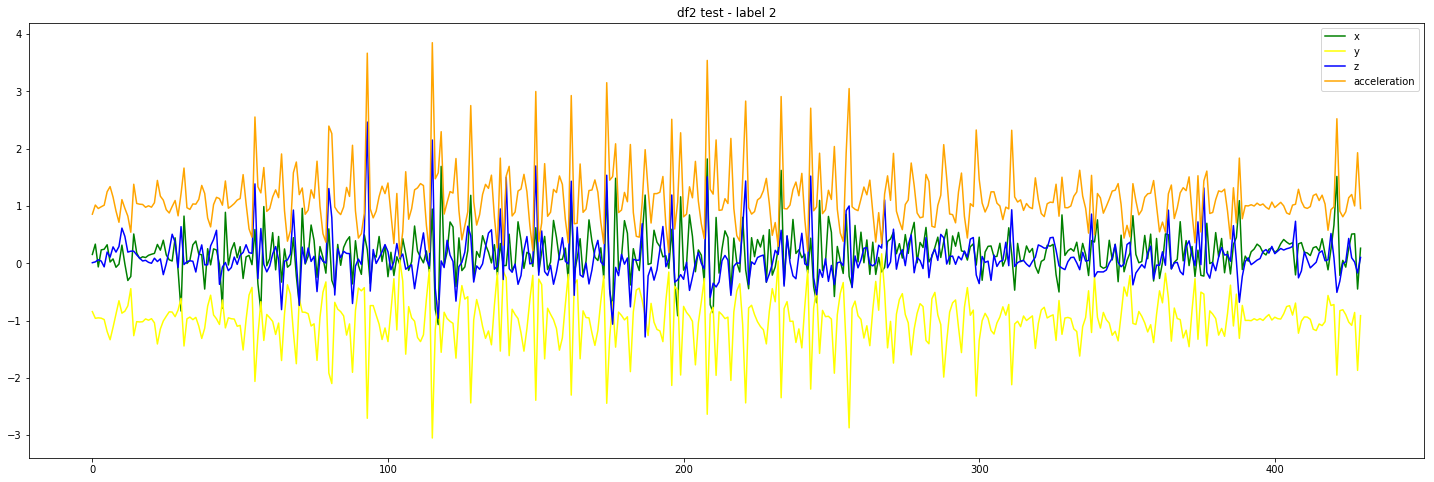

In [48]:
start = 0
end = 430
plt.figure(figsize=(25,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(end-start),df2_test_l2[start:end].x, color = 'green')
plt.plot(range(end-start),df2_test_l2[start:end].y, color = 'yellow')
plt.plot(range(end-start),df2_test_l2[start:end].z, color = 'blue')
plt.plot(range(end-start),df2_test_l2[start:end].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('df2 test - label 2')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [49]:
df2_test_l2_2 = df2_test_l2[80:250]

In [50]:
labels_xyz_l2 = automated_prediction_process(df2_test_l2_2,movelet_dict_xyz,['x','y','z'])

My program took 6.559783220291138 to run


In [51]:
df2_test_l2_2 =df2_test_l2_2.reset_index() 

In [52]:
df2_test_l2_2

,index,index_0,index_1,timestamp,UTC,x,y,z,label,acceleration,p_label_xyz,p_label_xyza
0,90,170,173,1.565110e+12,2019-08-06T16:45:48.126,0.601273,-1.916428,1.304932,2,2.395218,2,2
1,91,171,174,1.565110e+12,2019-08-06T16:45:48.227,-0.296844,-2.098846,0.796738,2,2.264523,2,2
2,92,172,175,1.565110e+12,2019-08-06T16:45:48.327,-0.440369,-0.681580,-0.553818,2,0.982441,2,2
3,93,173,176,1.565110e+12,2019-08-06T16:45:48.427,0.329117,-0.801208,0.251617,2,0.901978,2,2
4,94,174,177,1.565110e+12,2019-08-06T16:45:48.527,-0.034958,-0.844055,0.097305,2,0.850364,2,2
5,95,175,178,1.565110e+12,2019-08-06T16:45:48.627,0.277115,-0.918655,0.209595,2,0.982166,2,2
6,96,176,179,1.565110e+12,2019-08-06T16:45:48.728,0.392899,-1.253418,0.172607,2,1.324847,2,2
7,97,177,180,1.565110e+12,2019-08-06T16:45:48.828,0.463654,-1.057938,0.169266,2,1.167415,2,2
8,98,178,181,1.565110e+12,2019-08-06T16:45:48.928,-0.359695,-1.903183,-0.702148,2,2.060218,2,2
9,99,179,182,1.565110e+12,2019-08-06T16:45:49.028,0.393982,-0.823532,-0.048569,2,0.914213,2,2


In [53]:
df2_test_l2_2['p_label_xyz_2'] = labels_xyz_l2

In [54]:
accu(df2_test_l2_2.label,df2_test_l2_2.p_label_xyz_2)

0.8235294117647058

In [55]:
#test labels processing
#read label csv

#read accelerometer csv

#Merge dataframes

#fill gaps in label columns

# Run prediction

# Run Accuracy

In [56]:
#tooling
#Generate accuracy function which output will be a value of accuracy for each label
def differential_accuracy (dataframe,true_value_column,predicted_value_column,label_list):
    print('overall accuracy:',accu(dataframe[true_value_column],dataframe[predicted_value_column]))
    accuracies = []
    for l in label_list:
        dataframe_label = dataframe[dataframe[true_value_column] == l]
        acc = accu(dataframe_label[true_value_column],dataframe_label[predicted_value_column])
        accuracies.append([l,acc])
        print('label',l,':',acc)
   

In [57]:
differential_accuracy(df2_test,'label','p_label_xyz',[1,2,3,4])

overall accuracy: 0.6666666666666666
label 1 : 1.0
label 2 : 0.4883720930232558
label 3 : 0.8214285714285714
label 4 : 0.7619047619047619


In [58]:
df.to_csv('df.csv')

In [59]:
test2_df2=pd.read_csv('test2_df2.csv')

In [60]:
labels_xyz_l2 = automated_prediction_process(test2_df2,movelet_dict_xyz,['x','y','z'])

My program took 19.321429014205933 to run


In [61]:
test2_df2['p_label'] = labels_xyz_l2

In [62]:
differential_accuracy(test2_df2,'label','p_label',[1,2,3,4])

overall accuracy: 0.84
label 1 : 1.0
label 2 : 0.7142857142857143
label 3 : 0.8846153846153846
label 4 : 0.8333333333333334


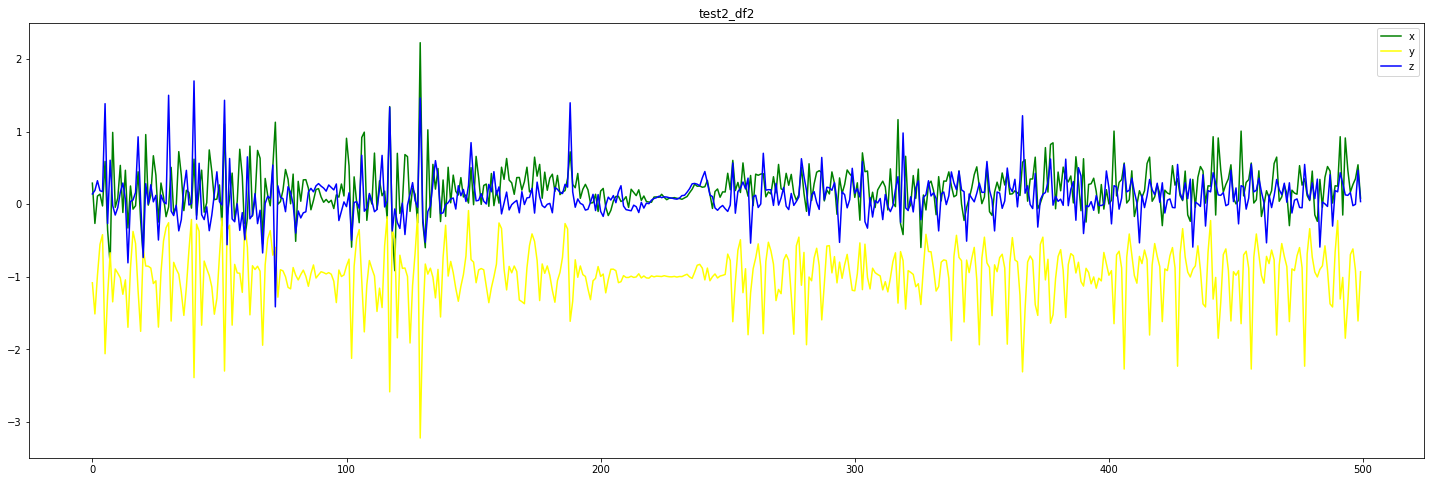

In [63]:
start = 0
end = test2_df2.shape[0]
plt.figure(figsize=(25,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(end-start),test2_df2[start:end].x, color = 'green')
plt.plot(range(end-start),test2_df2[start:end].y, color = 'yellow')
plt.plot(range(end-start),test2_df2[start:end].z, color = 'blue')
#plt.plot(range(end-start),test2_df2[start:end].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('test2_df2')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [64]:
test2_df2.to_csv('test2_df2_predicted.csv')

In [65]:
df_test_ts = pd.read_csv('test_time_series.csv')
df_test_l = pd.read_csv('test_labels.csv')
df_test= pd.merge(df_test_ts,df_test_l, on=['timestamp'], how = 'left')


In [66]:
df_test = df_test[['timestamp','UTC time_x','x','y','z']]

In [67]:
df_test

,timestamp,UTC time_x,x,y,z
0,1565110306139,2019-08-06T16:51:46.139,0.034286,-1.504456,0.157623
1,1565110306239,2019-08-06T16:51:46.239,0.409164,-1.038544,0.030975
2,1565110306340,2019-08-06T16:51:46.340,-0.234390,-0.984558,0.124771
3,1565110306440,2019-08-06T16:51:46.440,0.251114,-0.787003,0.054810
4,1565110306540,2019-08-06T16:51:46.540,0.109924,-0.169510,0.235550
5,1565110306640,2019-08-06T16:51:46.640,0.583969,-0.513306,0.924362
6,1565110306740,2019-08-06T16:51:46.740,-0.058807,-0.752899,0.238098
7,1565110306841,2019-08-06T16:51:46.841,0.463318,-1.152679,0.013855
8,1565110306941,2019-08-06T16:51:46.941,0.397049,-0.891922,0.000656
9,1565110307041,2019-08-06T16:51:47.041,0.098282,-0.833771,0.118042


In [68]:
labels_test = automated_prediction_process(df_test,movelet_dict_xyz,['x','y','z'])

My program took 50.81571388244629 to run


In [69]:
df_test['labels'] = labels_test

In [70]:
with open('labels_test.txt', 'w') as f:
    for item in labels_test:
        f.write("%s\n" % item)

In [71]:
print(labels_test)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

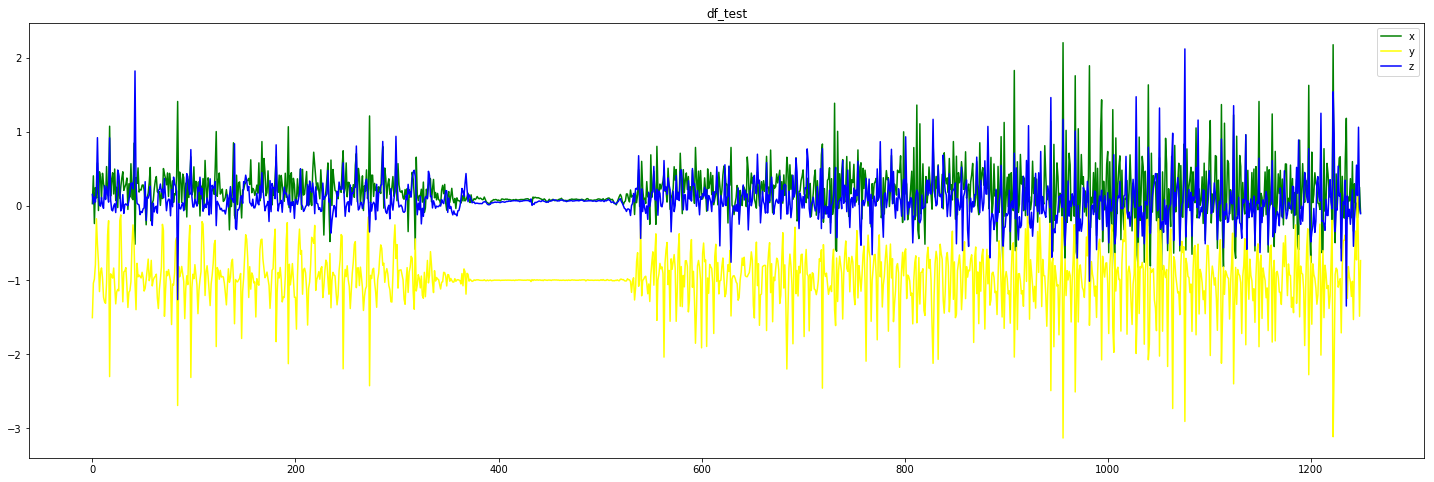

In [72]:
start = 0
end = df_test.shape[0]
plt.figure(figsize=(25,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(end-start),df_test[start:end].x, color = 'green')
plt.plot(range(end-start),df_test[start:end].y, color = 'yellow')
plt.plot(range(end-start),df_test[start:end].z, color = 'blue')
#plt.plot(range(end-start),test2_df2[start:end].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('df_test')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [73]:
labels_test[350:550]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [74]:
df_test_l

,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN
5,24389,1565110312045,2019-08-06T16:51:52.045,NaN
6,24399,1565110313047,2019-08-06T16:51:53.047,NaN
7,24409,1565110314049,2019-08-06T16:51:54.049,NaN
8,24419,1565110315051,2019-08-06T16:51:55.051,NaN
9,24429,1565110316054,2019-08-06T16:51:56.054,NaN


In [75]:
df_test_labels_small = pd.merge(df_test_l,df_test, on=['timestamp'], how = 'left')

In [76]:
df_test_labels_small

,Unnamed: 0,timestamp,UTC time,label,UTC time_x,x,y,z,labels
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN,2019-08-06T16:51:47.041,0.098282,-0.833771,0.118042,4
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN,2019-08-06T16:51:48.043,0.348465,-0.946701,-0.051041,4
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN,2019-08-06T16:51:49.046,0.377335,-0.849243,-0.026474,4
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN,2019-08-06T16:51:50.048,0.110077,-0.520325,0.312714,4
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN,2019-08-06T16:51:51.050,0.283478,-0.892548,-0.085876,4
5,24389,1565110312045,2019-08-06T16:51:52.045,NaN,2019-08-06T16:51:52.045,0.039337,-1.075836,-0.259964,1
6,24399,1565110313047,2019-08-06T16:51:53.047,NaN,2019-08-06T16:51:53.047,0.102356,-0.245255,0.228683,4
7,24409,1565110314049,2019-08-06T16:51:54.049,NaN,2019-08-06T16:51:54.049,0.342072,-1.051315,-0.007614,3
8,24419,1565110315051,2019-08-06T16:51:55.051,NaN,2019-08-06T16:51:55.051,0.432999,-0.910416,0.046341,4
9,24429,1565110316054,2019-08-06T16:51:56.054,NaN,2019-08-06T16:51:56.054,0.204208,-0.918640,-0.009323,4


In [77]:
df_test.to_csv('df_test.csv')


In [78]:
len(list(df_test_labels_small.labels))

125

In [79]:
#vamos a probar de ajustar el algoritmo teniendo en cuenta si hay los movimientos duran como minimo 3 segundo
#tengo que probar poniendo un if que cambie el valor si el anterior y el siguiente son iguales y el valor en cuestion
#es distinto

In [80]:
y = df_test_labels_small['labels']

In [81]:
y

0      4
1      4
2      4
3      4
4      4
5      1
6      4
7      3
8      4
9      4
10     4
11     4
12     4
13     1
14     4
15     3
16     4
17     4
18     4
19     4
20     4
21     4
22     1
23     1
24     4
25     4
26     4
27     4
28     4
29     4
      ..
95     2
96     2
97     3
98     2
99     3
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    4
110    3
111    2
112    2
113    4
114    4
115    3
116    2
117    4
118    2
119    2
120    4
121    4
122    2
123    2
124    2
Name: labels, Length: 125, dtype: int64

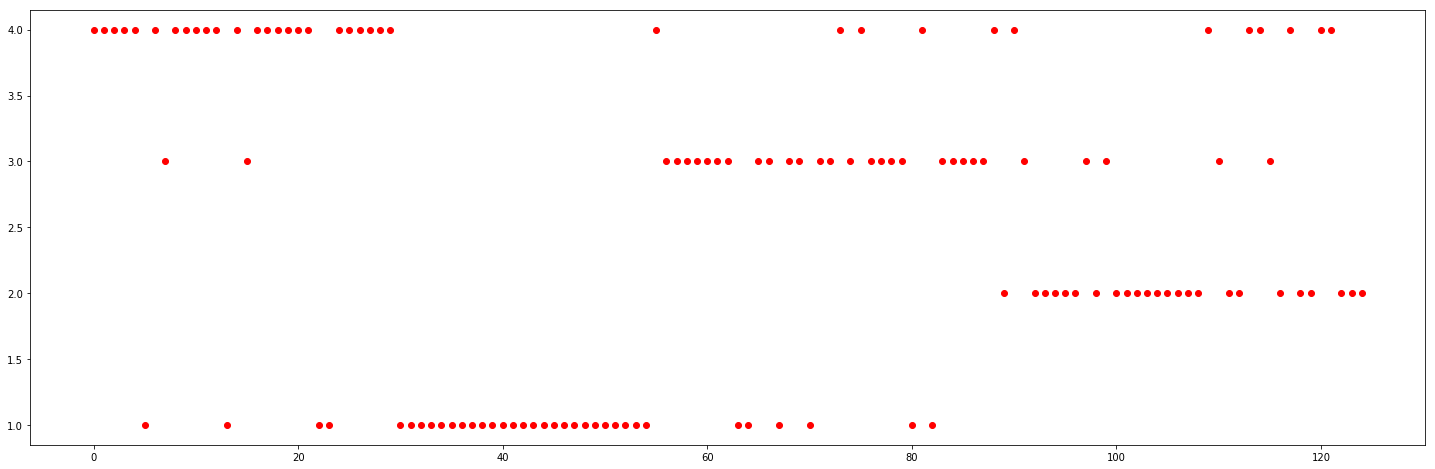

In [82]:
plt.figure(figsize=(25,8))
plt.plot(range(125),y,'o', color ='red')

In [106]:
def smooth_labels (series,neighbors):
    '''this function takes a dataframe series corresponding to the predicted labels
    and a number of neighbor labels to smooth the predicted labels based on the fact that movements
    last at least a couple of seconds. It returns a smoothed list of labels'''
    smooth_labels = []
    neighbors = neighbors
    smooth_labels[0:0] = series.loc[0:neighbors]
    series = series.values    
    for i in range (neighbors,len(series)-neighbors):
        if any(x!=series[i] for x in smooth_labels[i-neighbors:i]) and any (y!=series[i] for y in series[i+1:i+1+neighbors]):
            smooth_labels.append(smooth_labels[i-neighbors])
        #elif any(x!=series[i] for x in smooth_labels[i-neighbors:i])and all (y==series[i] for y in series[i+1:i+1+neighbors]):
            smooth_labels.append(series[i+1])
        #elif all(x==series[i] for x in smooth_labels[i-neighbors:i])and any (y==series[i] for y in series[i+1:i+1+neighbors]):
            smooth_labels.append(series[i+1])    
        #if series.loc[i] != smooth_labels[i-neighbors] and series.loc[i] != series.loc[i+neighbors]:
        #    smooth_labels.append(series.loc[i-neighbors])
        else:
            smooth_labels.append(series[i])
    for j in range (len(series)-neighbors,len(series)-1):
        smooth_labels.append(series[j])
    #smooth_labels[0:0] = df_test_labels_small['labels'].loc[0:neighbors]
    #smooth_labels.append (z for z in [100,2]) #(z for z in (list(series[len(series)-3-neighbors:len(series)-1])))
    return smooth_labels

In [108]:
stm = smooth_labels(df_test_labels_small.labels,2)

In [109]:
stm

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [110]:
len(stm)

125

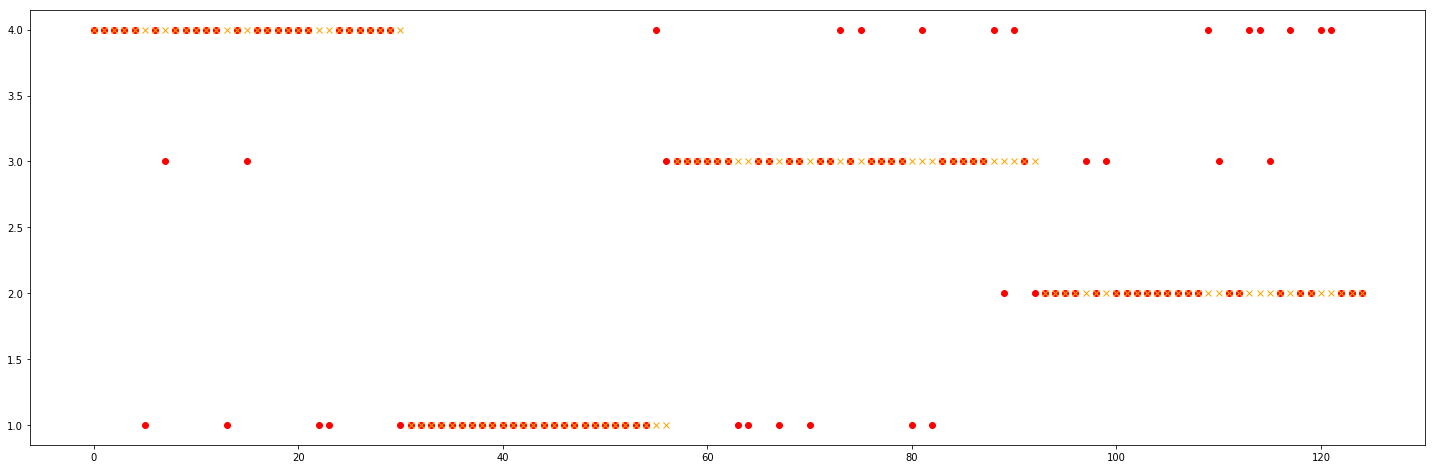

In [114]:
plt.figure(figsize=(25,8))
plt.plot(range(125),y,'o', color ='red')
plt.plot(range(125),stm,'x',color = 'orange')

In [113]:
pd.DataFrame({'l':df_test_labels_small.labels,
             'ls':stm})

,l,ls
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4
5,1,4
6,4,4
7,3,4
8,4,4
9,4,4


In [118]:
autotest_labels_smooth = smooth_labels(df2_test.p_label_xyz,2)



In [117]:
df2_test

,index_0,index_1,timestamp,UTC,x,y,z,label,acceleration,p_label_xyz,p_label_xyza
0,80,83,1.565110e+12,2019-08-06T16:45:39.106,0.212524,-0.976364,0.074997,1,1.002037,1,1
1,81,84,1.565110e+12,2019-08-06T16:45:39.206,0.319931,-0.999161,0.070587,1,1.051504,1,1
2,82,85,1.565110e+12,2019-08-06T16:45:39.306,0.044952,-1.130875,0.036713,1,1.132363,1,1
3,83,86,1.565110e+12,2019-08-06T16:45:39.406,0.027786,-1.056137,0.206299,1,1.076456,1,1
4,84,87,1.565110e+12,2019-08-06T16:45:39.507,-0.102234,-0.942154,0.176651,1,0.964008,1,1
5,85,88,1.565110e+12,2019-08-06T16:45:39.607,0.243851,-0.950607,0.333237,1,1.036419,1,1
6,86,89,1.565110e+12,2019-08-06T16:45:39.707,0.148941,-0.695190,0.288696,1,0.767345,1,1
7,87,90,1.565110e+12,2019-08-06T16:45:39.807,0.108704,-0.853134,0.478043,1,0.983961,1,1
8,88,91,1.565110e+12,2019-08-06T16:45:39.908,0.611084,-1.319809,0.048599,1,1.455225,1,1
9,89,92,1.565110e+12,2019-08-06T16:45:40.008,0.127579,-1.112778,-0.192474,1,1.136484,1,1


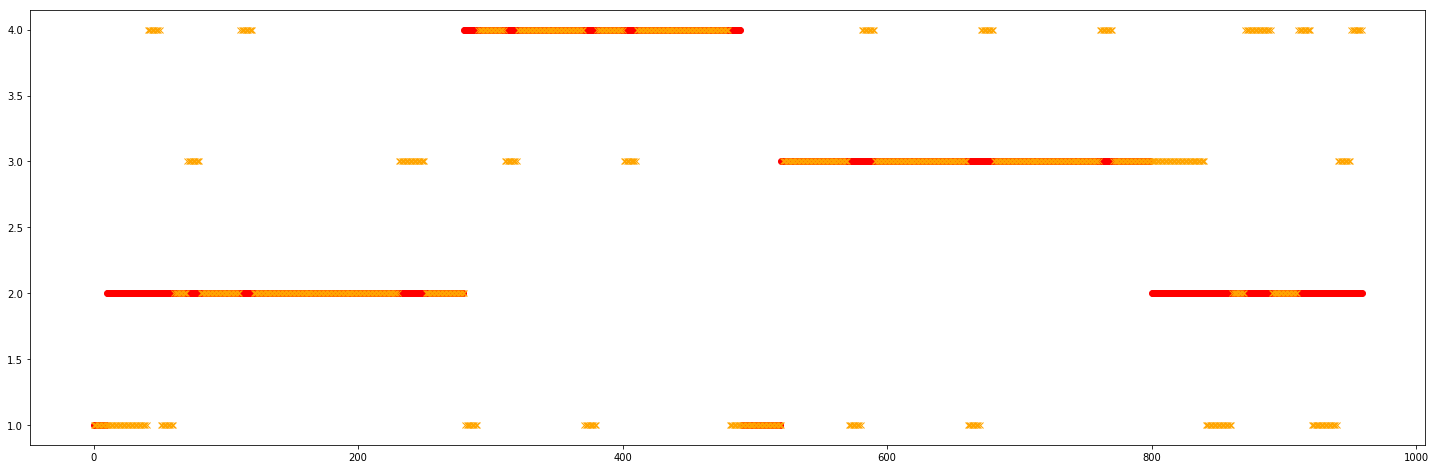

In [124]:
x = df2_test.label
y= autotest_labels_smooth
plt.figure(figsize=(25,8))
plt.plot(range(960),x,'o', color ='red')
plt.plot(range(960),y,'x',color = 'orange')

In [123]:
len(autotest_labels_smooth)

960

In [125]:
test2_df2

,timestamp,x,y,z,label,p_label
0,1565109945119,0.290436,-1.083405,0.141129,2,2
1,1565109945220,-0.265244,-1.513199,0.189316,2,2
2,1565109945320,0.111771,-0.982285,0.323990,2,2
3,1565109945420,0.138489,-0.554642,0.186050,2,2
4,1565109945520,-0.024078,-0.420502,0.173630,2,2
5,1565109945621,0.589767,-2.062119,1.386108,2,2
6,1565109945721,-0.356339,-1.261475,-0.266190,2,2
7,1565109945821,-0.832458,-0.669830,0.606506,2,2
8,1565109945921,0.990189,-1.346603,-0.018295,2,2
9,1565109946022,-0.043243,-0.893326,-0.149338,2,2


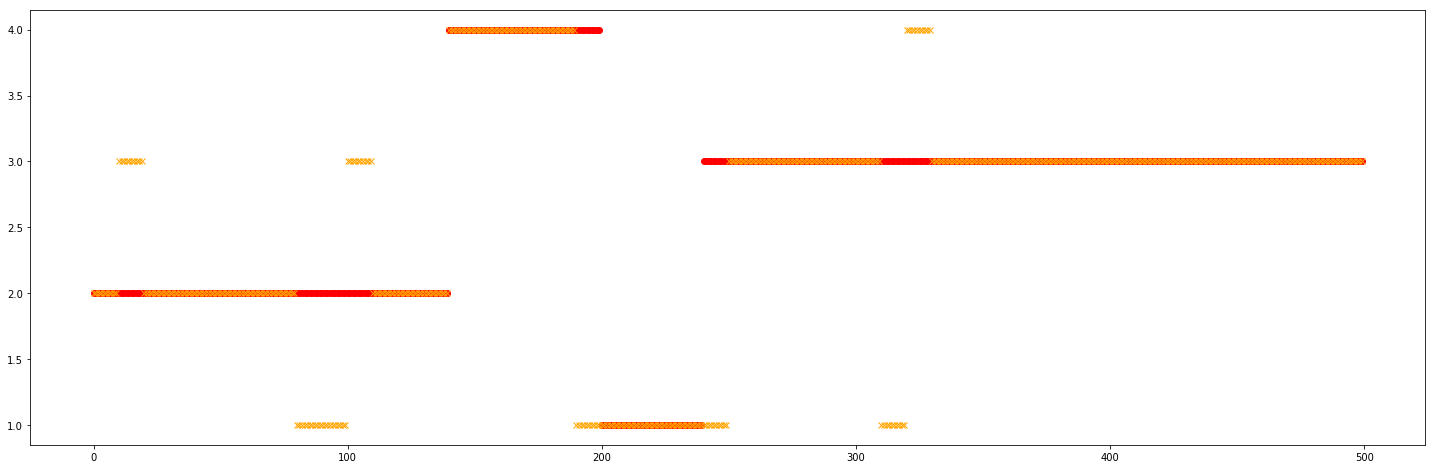

In [128]:
x = test2_df2.label
y= test2_df2.p_label
plt.figure(figsize=(25,8))
plt.plot(range(len(x)),x,'o', color ='red')
plt.plot(range(len(X)),y,'x',color = 'orange')

In [189]:
z = smooth_labels(test2_df2.p_label,20)

In [190]:
test2_df2['p_label_s'] = z

In [191]:
accu(test2_df2.label,test2_df2.p_label_s)

0.938

overall accuracy: 0.84
label 1 : 1.0
label 2 : 0.7142857142857143
label 3 : 0.8846153846153846
label 4 : 0.8333333333333334

In [192]:
differential_accuracy(test2_df2,'label','p_label_s',[1,2,3,4])

overall accuracy: 0.938
label 1 : 1.0
label 2 : 0.9285714285714286
label 3 : 0.9576923076923077
label 4 : 0.8333333333333334


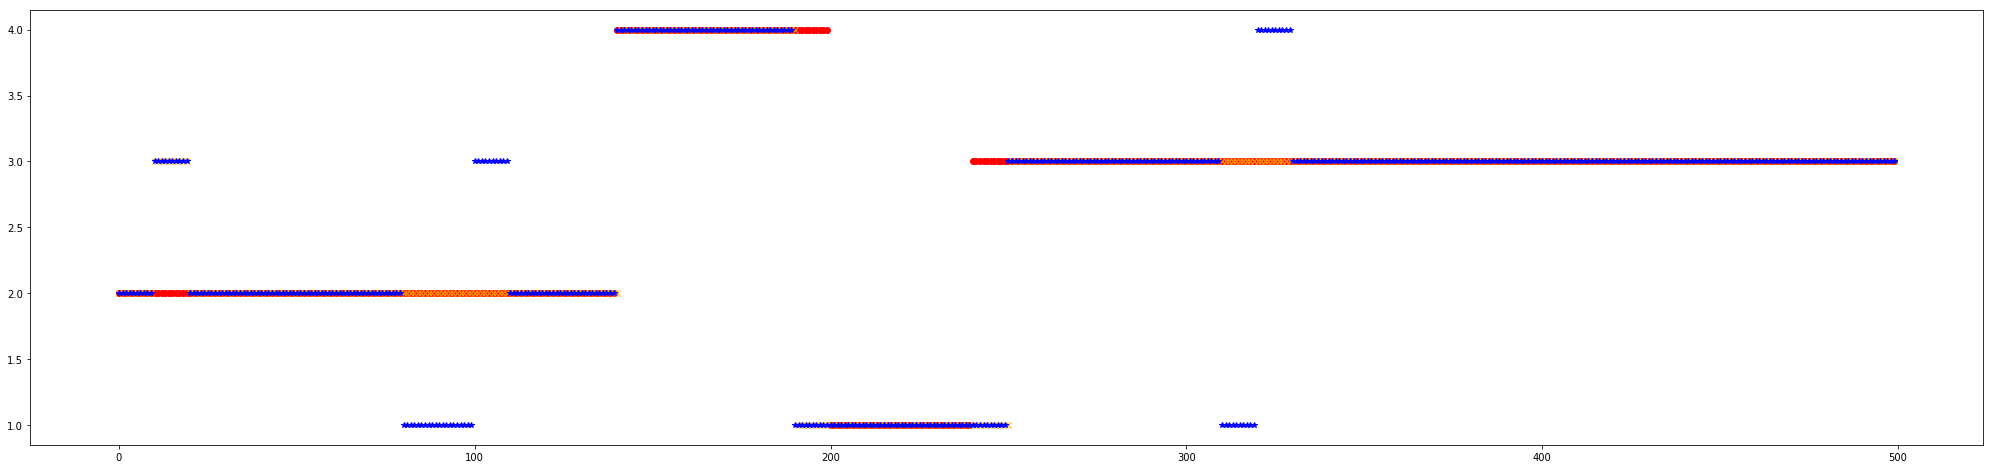

In [194]:
x = test2_df2.label
y= test2_df2.p_label_s
p= test2_df2.p_label
plt.figure(figsize=(35,8))
plt.plot(range(len(x)),x,'o', color ='red')
plt.plot(range(len(y)),y,'x',color = 'orange')
plt.plot(range(len(p)),p,'*',color = 'blue')


In [198]:
test2_df2_merge= pd.merge(df_trl,test2_df2, on=['timestamp'], how = 'left')

In [200]:
test2_df2_merge.dropna(inplace = True)

In [201]:
test2_df2_merge

,Unnamed: 0,timestamp,UTC time,label_x,x,y,z,label_y,p_label,p_label_s
14,20729,1565109945119,2019-08-06T16:45:45.119,2,0.290436,-1.083405,0.141129,2.0,2.0,2.0
15,20739,1565109946122,2019-08-06T16:45:46.122,2,0.083878,-0.950729,-0.048096,2.0,3.0,3.0
16,20749,1565109947124,2019-08-06T16:45:47.124,2,-0.720718,-0.613708,-0.735840,2.0,2.0,2.0
23,20819,1565109954140,2019-08-06T16:45:54.140,2,-0.038666,-0.255402,1.501907,2.0,2.0,2.0
24,20829,1565109955142,2019-08-06T16:45:55.142,2,0.620819,-2.391296,1.699600,2.0,2.0,2.0
25,20839,1565109956145,2019-08-06T16:45:56.145,2,0.265335,-0.718292,0.035339,2.0,2.0,2.0
38,20969,1565109969175,2019-08-06T16:46:09.175,2,-0.470779,-0.279663,-0.490295,2.0,2.0,2.0
39,20979,1565109970177,2019-08-06T16:46:10.177,2,-0.021774,-0.363892,0.079330,2.0,2.0,2.0
59,21179,1565109990223,2019-08-06T16:46:30.223,2,-0.512085,-0.978714,-0.398026,2.0,1.0,2.0
60,21189,1565109991225,2019-08-06T16:46:31.225,2,0.100601,-0.931488,0.249435,2.0,1.0,2.0


In [207]:
differential_accuracy(test2_df2_merge,'label_x','p_label',[1,2,3,4])

overall accuracy: 0.84
label 1 : 1.0
label 2 : 0.7142857142857143
label 3 : 0.8846153846153846
label 4 : 0.8333333333333334


In [220]:
zz = smooth_labels(test2_df2_merge.p_label,1)

In [221]:
test2_df2_merge['p_label_smoothed']=zz

ValueError: Length of values does not match length of index

In [222]:
len(zz)

48

In [218]:
test2_df2_merge.columns

Index(['Unnamed: 0', 'timestamp', 'UTC time', 'label_x', 'x', 'y', 'z',
       'label_y', 'p_label', 'p_label_s'],
      dtype='object')

In [219]:
len(test2_df2_merge.label_x)

50

In [225]:
test2_df_2_merge

NameError: name 'test2_df_2_merge' is not defined